**Loading the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading csv file**

In [2]:
df_candy = pd.read_csv('candy.csv')

**Reading top 5 rows from the dataset**

In [3]:
df_candy.head(5)

,id,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


**Determining Target Variable**

Based on the above columns, the **winpercent** seems like a suitable target variable. This is because it represents the overall **"winning" **quality of the candy, likely reflecting its popularity or preference in comparison to others.

**Information of the feature variables**

In [4]:
df_candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                83 non-null     int64  
 1   competitorname    83 non-null     object 
 2   chocolate         83 non-null     object 
 3   fruity            83 non-null     object 
 4   caramel           83 non-null     object 
 5   peanutyalmondy    83 non-null     object 
 6   nougat            83 non-null     object 
 7   crispedricewafer  83 non-null     object 
 8   hard              83 non-null     object 
 9   bar               83 non-null     object 
 10  pluribus          83 non-null     object 
 11  sugarpercent      83 non-null     float64
 12  pricepercent      83 non-null     float64
 13  winpercent        83 non-null     float64
dtypes: float64(3), int64(1), object(10)
memory usage: 9.2+ KB


**Column names**

In [5]:
df_candy.columns

Index(['id', 'competitorname', 'chocolate', 'fruity', 'caramel',
       'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar',
       'pluribus', 'sugarpercent', 'pricepercent', 'winpercent'],
      dtype='object')

**Checking whether there are null values in the dataset using isnull function**

In [6]:
df_candy.isnull().sum()

id                  0
competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

There are no null data in the dataset. So data cleanup is not required.

**Checking duplicate values in the Candy dataset**

In [7]:
df_candy.duplicated().sum()

0

There are no duplicate values in the dataset. So not necessary to remove the duplicate values.

**Retrieving total number of rows and columns**

In [8]:
df_candy.shape

(83, 14)

There are 85 rows and 13 columns in the Candy dataset.

Making a copy of df_candy dataframe to df_candy_mp

In [9]:
df_candy_mp = df_candy.copy()

**Summary Statistics for the numerical variables**

In [10]:
# Generate summary statistics for the numerical variables
numerical_summary = df_candy.describe()
numerical_summary


,id,sugarpercent,pricepercent,winpercent
count,83.000000,83.000000,83.000000,83.000000
mean,41.000000,0.489916,0.472627,50.584908
std,24.103942,0.276498,0.286503,14.748880
min,0.000000,0.034000,0.011000,22.445341
25%,20.500000,0.267000,0.261000,39.163280
50%,41.000000,0.465000,0.465000,48.982651
75%,61.500000,0.732000,0.703000,60.332349
max,82.000000,0.988000,0.976000,84.180290


In [11]:
# Conversion of binary variables 0/1 into actual categorical types and get summary statistics
categorical_columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
                       'crispedricewafer', 'hard', 'bar', 'pluribus']

# Convert to categorical types
for col in categorical_columns:
    df_candy[col] = df_candy[col].astype('category')

categorical_summary = df_candy[categorical_columns].describe()

categorical_summary


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
count,83,83,83,83,83,83,83,83,83
unique,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,No,Yes
freq,46,45,69,69,76,76,68,62,44


**Visualization**

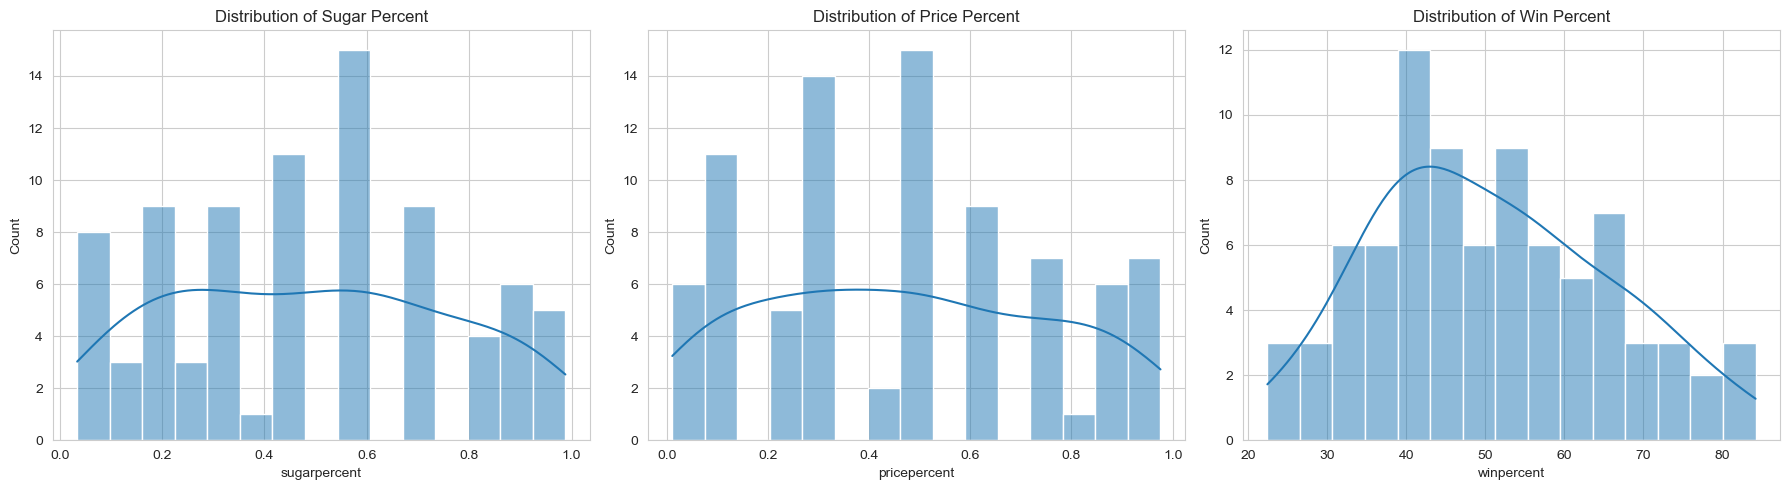

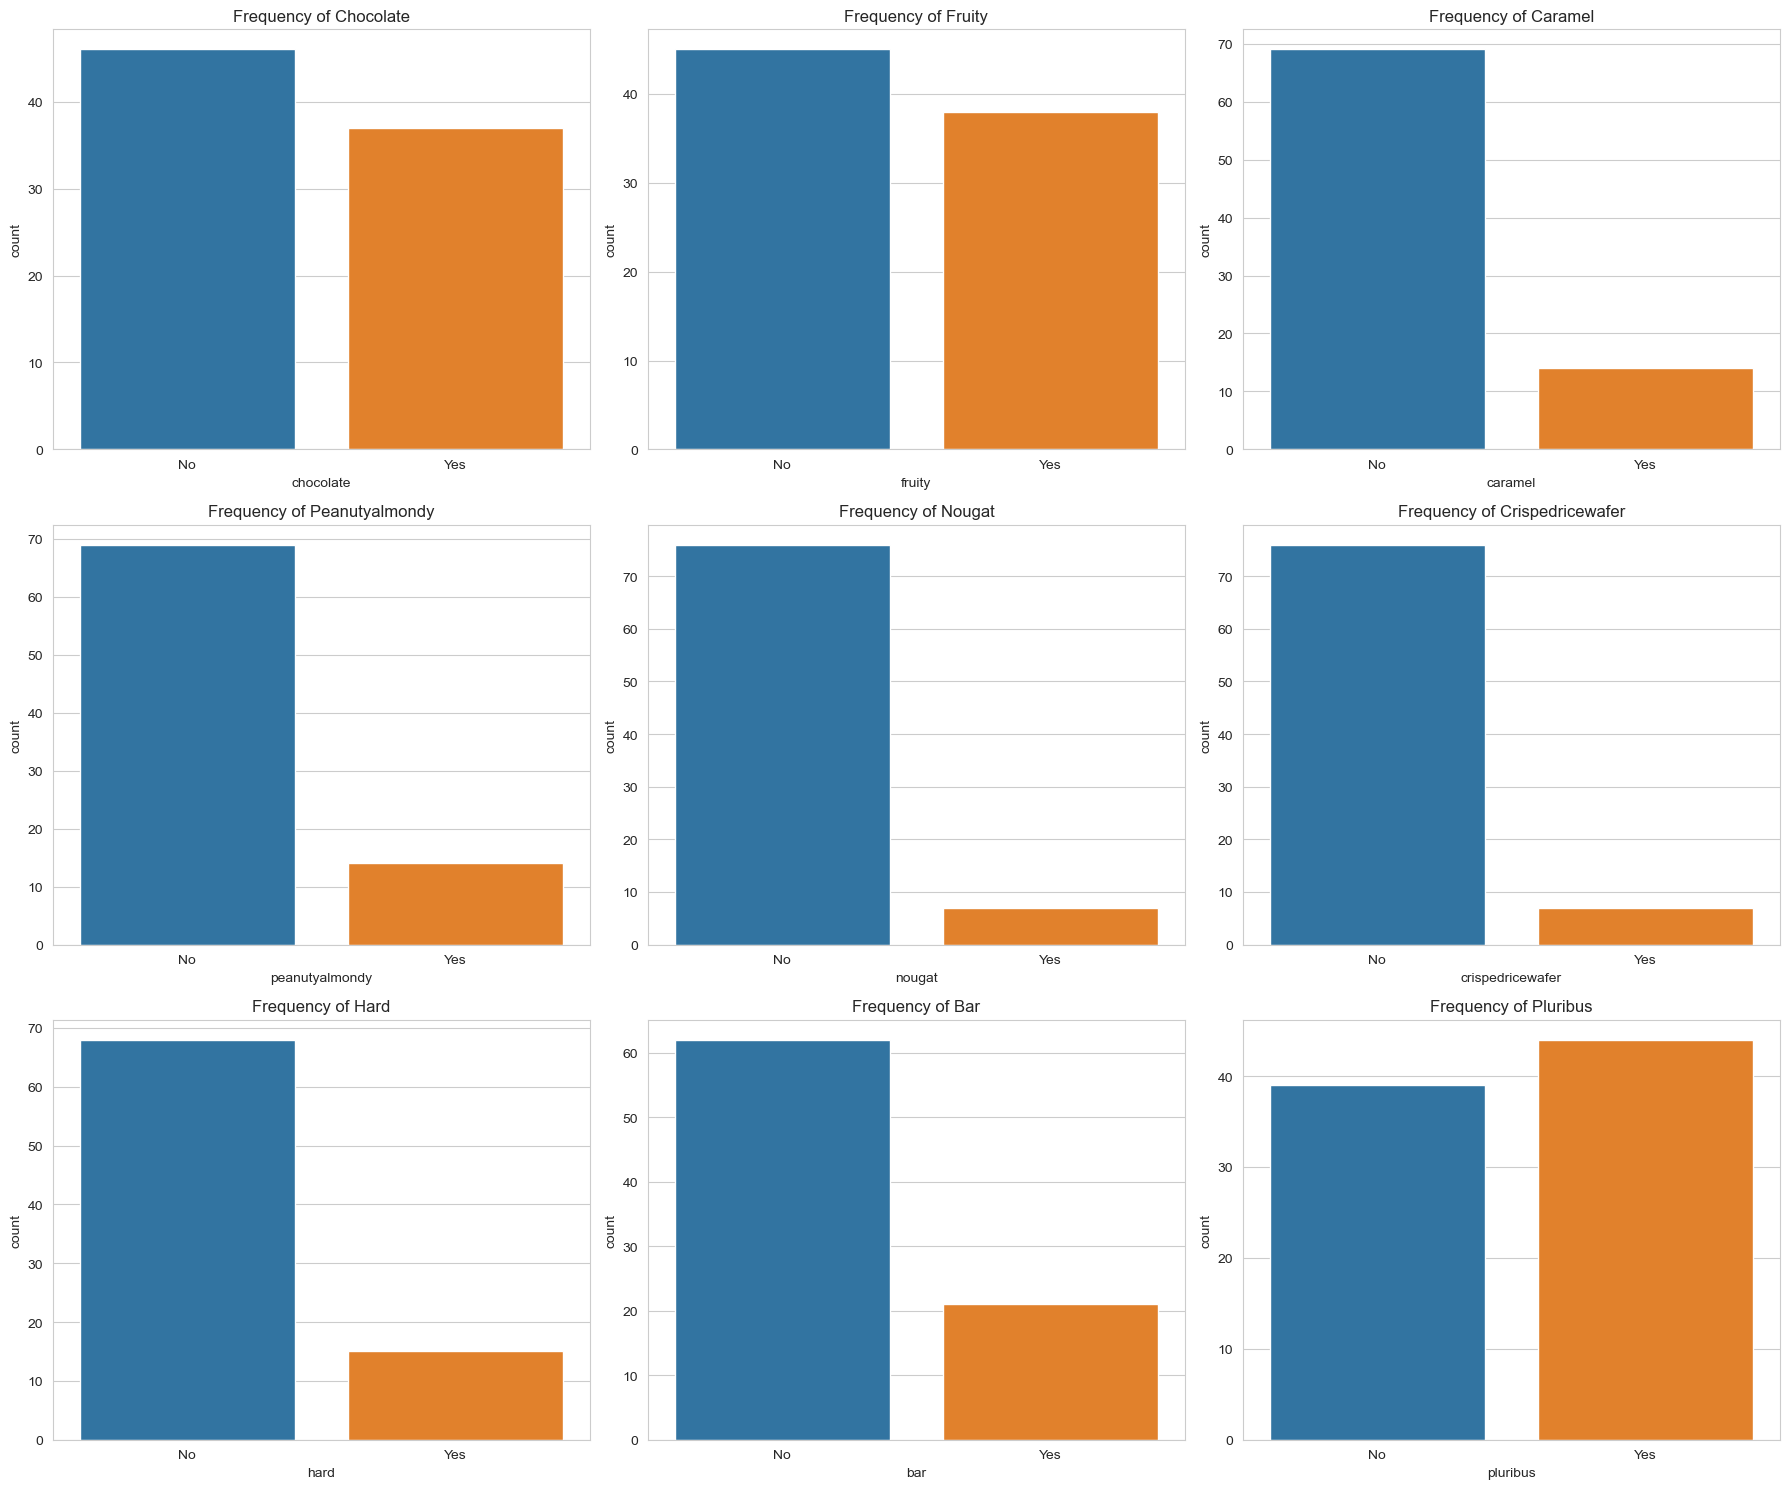

In [12]:
import warnings
warnings.simplefilter("ignore", FutureWarning)

# Replace infinities with NaN before plotting
df_candy.replace([np.inf, -np.inf], np.nan, inplace=True)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for numerical variables
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_candy['sugarpercent'], bins=15, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Sugar Percent')
sns.histplot(df_candy['pricepercent'], bins=15, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Price Percent')
sns.histplot(df_candy['winpercent'], bins=15, kde=True, ax=ax[2])
ax[2].set_title('Distribution of Win Percent')

plt.tight_layout()
plt.show()

# Bar charts for categorical variables
fig, ax = plt.subplots(3, 3, figsize=(18, 15))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df_candy, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f'Frequency of {col.capitalize()}')

plt.tight_layout()
plt.show()


In [13]:
df_candy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                83 non-null     int64   
 1   competitorname    83 non-null     object  
 2   chocolate         83 non-null     category
 3   fruity            83 non-null     category
 4   caramel           83 non-null     category
 5   peanutyalmondy    83 non-null     category
 6   nougat            83 non-null     category
 7   crispedricewafer  83 non-null     category
 8   hard              83 non-null     category
 9   bar               83 non-null     category
 10  pluribus          83 non-null     category
 11  sugarpercent      83 non-null     float64 
 12  pricepercent      83 non-null     float64 
 13  winpercent        83 non-null     float64 
dtypes: category(9), float64(3), int64(1), object(1)
memory usage: 5.2+ KB


**Heatmap**

In [14]:
# Assuming df_candy is already loaded
# Convert categorical binary variables to numeric if they are not already
categorical_columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
                       'crispedricewafer', 'hard', 'bar', 'pluribus']

for col in categorical_columns:
    if df_candy[col].dtype == 'category':
        df_candy[col] = df_candy[col].cat.codes  # This converts categories to numeric codes

# Exclude non-numeric columns explicitly
numeric_df = df_candy.select_dtypes(include=[np.number])

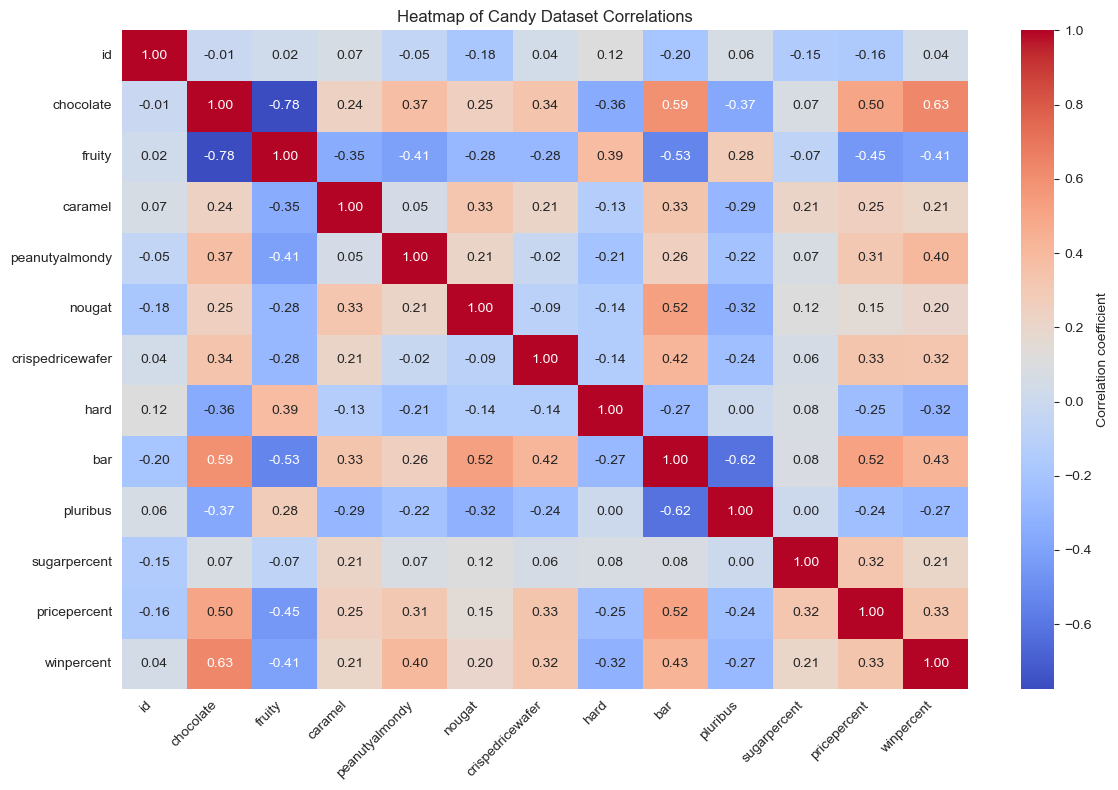

In [15]:
# Calculate the correlation matrix
corr = df_candy.drop(['competitorname'], axis=1).corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Heatmap of Candy Dataset Correlations')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [17]:
# Define the features (X) and the target (y)
X = df_candy.drop(['competitorname', 'winpercent'], axis=1)
y = df_candy['winpercent']


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Apply the LinearRegression model and calculate evaluation metrics such as r_squared, mae, mse and rmse.

In [19]:
# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Calculate evaluation metrics for the model
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Linear Regression mae: {mae}")
print(f"Linear Regression mse: {mse}")
print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression R Square Score: {r_squared}")


Linear Regression mae: 9.40438190992602
Linear Regression mse: 129.12674003076637
Linear Regression RMSE: 11.363394740603107
Linear Regression R Square Score: 0.5129993208215559
